![](LogoIteso.jpg)

# Integrantes
+ Díaz Verduzco Alexia Marisol IF720500
+ Gónzalez Reyes Christian Eduardo IF721850
+ López Lazareno Diego Alberto IF722100

# 1.1 Portafolio de Inversión 

![](Investment.jpg)

## 1.2 Objetivos

### 1.2.1 Objetivo general

+ ***Elaborar un portafolio de inversión*** con activos de renta variable, ***acciones*** de empresas del mercado estadounidense y mexicano.

### 1.2.2 Objetivos específicos

+ ***Seleccionar 4 activos de renta variable***, acciones del mercado mexicano y estadounidense, de distintos sectores o giros comerciales. Lo anterior con el fin de ***diversificar el riesgo***. 
+ ***Encontrar el portafolio óptimo*** o los pesos para cada activo que maximizan el ***Ratio de Sharpe*** mediante una ***Simulación de Montecarlo*** (relación entre rentabilidad y riesgo).
+ ***Conocer la rentabilidad y volatilidad esperadas para nuestro portafolio***.

## 1.3 Modelo que representa el problema

### Media esperada del portafolio 
> $$ \mu_{p}=w^{T} \mu$$
+ Calcular la media esperada del portafolio nos permite conocer la rentabilidad del mismo. Donde $w$ son los pesos de cada activo y $\mu$ sus respectivas medias.

### Varianza esperada del portafolio
> $$ \sigma_{p}^{2}=w^{T} \sum w$$
+ Calcular la varianza esperada del portafolio nos permite conocer el riesgo del mismo. Donde $w$ son los pesos de cada activo.

### Ratio de Sharpe
> $$ SR= \frac{\mu_{p}}{\sigma_{p}} $$
+ El Ratio de Sharpe es la relación que existe entre la rentabilidad de un portafolio y su respectivo riesgo. La literatura financiera nos dice que a mayor ratio la rentabilidad del portafolio compensa realmente el riesgo que asume el inversor.

### ¿Qué situación representa el modelo? 

+ El modelo ***CAPM (Capital Asset Pricing)*** establece que podemos conformar un portafolio de inversión sólo con posiciones largas, es decir, dividiendo el capital del inversor en los instrumentos disponibles. Además, si asumimos que los ***rendimientos de tales activos son normalmente distribuidos***, la teoría nos dice que ***podemos conocer la media y varianza esperadas de dicha cartera***.

### ¿Cuáles son las limitaciones principales?
+ El modelo ***no incluye posiciones cortas***.
+ Los rendimientos de distintos activos pueden no estar distribuidos normalmente.
+ El modelo se basa en la ***administración pasiva de activos***, donde compramos y mantenemos los mismos hasta cierta fecha (1 año). En la realidad dichos activos necesitan rotarse varias veces al año, esto con el objetivo de tener mayores rendimientos.

## 1.4 Solución del problema

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
closes=web.DataReader(name="SBUX",data_source="yahoo",start="2017-11-13",end=None)
starbucks=closes["Adj Close"]
closes=web.DataReader(name="NKE",data_source="yahoo",start="2017-11-13",end=None)
nike=closes["Adj Close"]
closes=web.DataReader(name="FB",data_source="yahoo",start="2017-11-13",end=None)
saic=closes["Adj Close"]
closes=web.DataReader(name="BAC",data_source="yahoo",start="201-11-13",end=None)
pags=closes["Adj Close"]

stocks=pd.concat([starbucks,nike,saic,pags],axis=1)
stocks.columns=["Starbucks","Nike","FB","BAC"]
stocks.plot(figsize=(10,8));
plt.title("Stocks Portfolio");
plt.xlabel("Date");
plt.ylabel("USD");

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 201-11-13 00:00:00

In [3]:
log_ret=np.log(stocks/stocks.shift(1))
log_ret.head()

,Starbucks,Nike,SAIC,PAGS
Date,,,,
2018-10-31,NaN,NaN,NaN,NaN
2018-11-01,0.006159,0.023053,0.007310,0.037452
2018-11-02,0.092624,-0.002738,-0.009038,-0.030805
2018-11-05,0.002485,0.012329,-0.001298,-0.001842
2018-11-06,0.023451,-0.012460,0.012761,0.027638


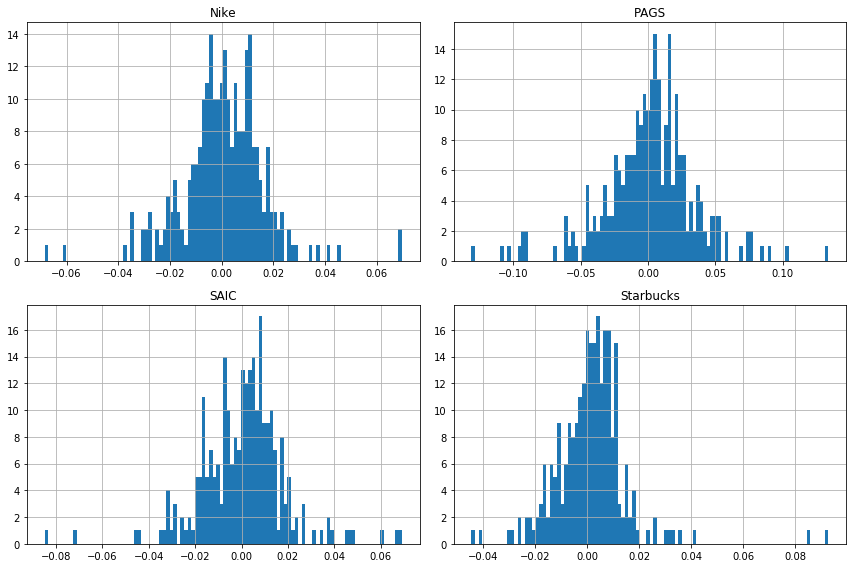

In [4]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [5]:
np.random.seed(101)
num_ports=5000
all_weights=np.zeros((num_ports,len(stocks.columns)))
ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharpe_arr=np.zeros(num_ports)

for i in range(num_ports):
    #Weights
    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights)

    #Save weights
    all_weights[i,:]=weights
    
    #Expected Return
    ret_arr[i]=np.sum((log_ret.mean()*weights)*252)

    #Expected volatility
    vol_arr[i]=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    #Sharpe Ratio
    sharpe_arr[i]=ret_arr[i]/vol_arr[i]

In [6]:
sharpe_arr.max()

1.7021283845967878

In [7]:
x=sharpe_arr.argmax()

### Solución factible: pesos para el portafolio



In [8]:
all_weights[x,:]

array([0.88109816, 0.08902351, 0.0274092 , 0.00246914])

In [9]:
max_sr_ret=ret_arr[x]
max_sr_vol=vol_arr[x]

## 1.5 Visualización de la solución del problema

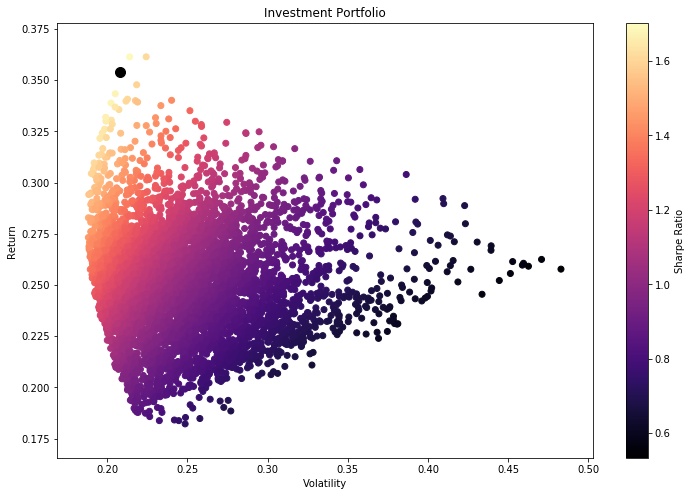

In [10]:
#COLORS PLASMA; INFERNO, MAGMA, CIVIDIS, VIRIDIS, COOL
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap="magma")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Investment Portfolio")

plt.scatter(max_sr_vol,max_sr_ret,c="black",s=100);

### Rentabilidad esperada para el portafolio óptimo

In [11]:
print("El retorno esperado del portafolio es de:",ret_arr[x])

El retorno esperado del portafolio es de: 0.3538014007369545


### Volatilidad esperada para el portafolio óptimo

In [12]:
print("La volatilidad esperada del portafolio es de:",vol_arr[x])

La volatilidad esperada del portafolio es de: 0.20785823439561843


## 1.6 Conclusiones

+ Se tomaron 4 distintos activos de renta variable para la elaboración del portafolio, cada uno de distinto sector empresarial;  de esta forma se pudo diversificar el riesgo sistémico. 
+ La Simulación de Montecarlo arrojó los pesos óptimos para la conformación de la cartera: dándonos un Ratio de Sharpe mayor a 1, que es lo recomendado en la literatura y teoría financiera.
+ A pesar del nivel de riesgo esperado para el portafolio, la rentabilidad es deseable, pues es muy superior a cualquier activo de renta fija disponible en el mercado. 

## 1.7 Referencias

+ Yves Hilpisch. (2014). Python for Finance. Estados Unidos: O'REILLY.